# Sentiment Analysis of Amazon Fine Food Reviews

This notebook will perform sentiment analysis on the Amazon Fine Food Reviews dataset using the VADER sentiment analyzer from NLTK.

**Contents**
* Introduction
* Data Loading and Exploration
* Data Preprocessing
* Sentiment Analysis with VADER
* Results Visualization
* Conclusion


# 1. Introduction
Sentiment analysis is a natural language processing technique used to determine whether data is positive, negative, or neutral. We'll analyze the sentiment of reviews in the dataset and see how it correlates with the provided ratings.

# 2. Data Loading and Exploration

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
plt.style.use('ggplot')


In [33]:
# Path to the dataset in Kaggle
data_dir = '/kaggle/input/amazon-fine-food-reviews/'

# Check the files in the directory
print("Files in the directory:", os.listdir(data_dir))

# Load the dataset
df = pd.read_csv(os.path.join(data_dir, 'Reviews.csv'))

# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")


Files in the directory: ['hashes.txt', 'Reviews.csv', 'database.sqlite']
Dataset shape: (568454, 10)


In [34]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [35]:
df = df.head(10000)
print(f"Subset shape: {df.shape}")


Subset shape: (10000, 10)


# 3. Data Preprocessing

In [36]:
df.isnull().sum()


Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [37]:
df = df.dropna(subset=['Text'])


# Quick EDA
Distribution of Ratings

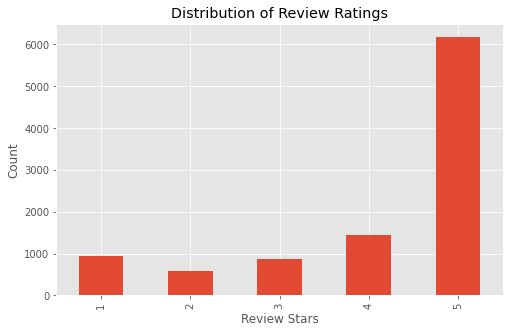

In [38]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Count')
ax.set_title('Distribution of Review Ratings')
plt.show()


# 4. Sentiment Analysis with VADER

In [39]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [40]:
sia = SentimentIntensityAnalyzer()


# Apply Sentiment Analysis
We'll create a function to compute sentiment scores for each review.

In [41]:
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound']


In [42]:
df[['neg', 'neu', 'pos', 'compound']] = df['Text'].apply(lambda x: pd.Series(get_sentiment(x)))


# Preview the Results

In [43]:
df[['Text', 'neg', 'neu', 'pos', 'compound']].head()


,Text,neg,neu,pos,compound
0,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,Product arrived labeled as Jumbo Salted Peanut...,0.079,0.853,0.068,-0.1027
2,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


# 5. Results Visualization

# Sentiment Scores Distribution
Histogram of Compound Scores

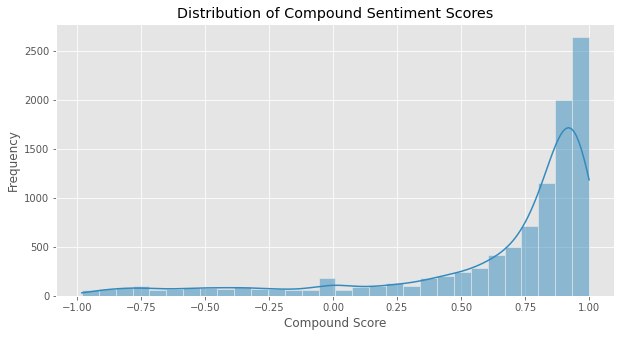

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(df['compound'], bins=30, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


# Correlation Between Sentiment Scores and Ratings

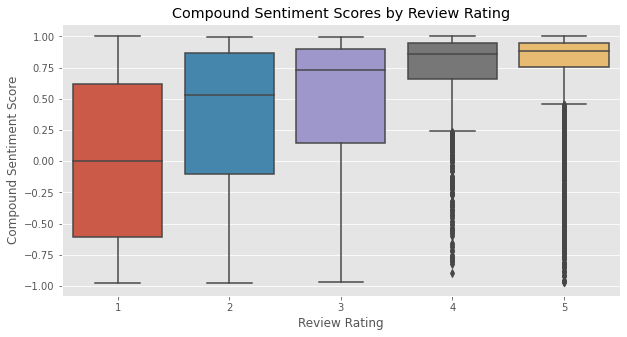

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Score', y='compound', data=df)
plt.title('Compound Sentiment Scores by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()


# Average Sentiment Scores by Rating

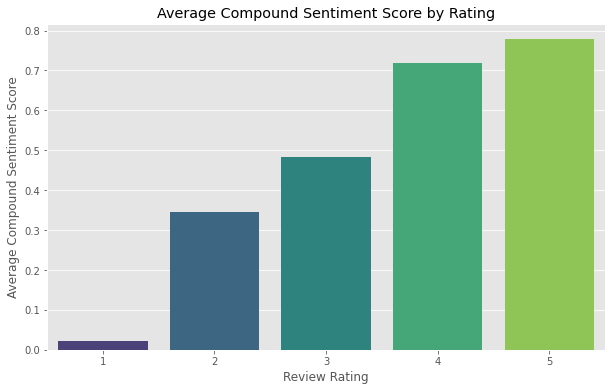

In [46]:
avg_sentiment = df.groupby('Score')[['neg', 'neu', 'pos', 'compound']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Score', y='compound', data=avg_sentiment, palette='viridis')
plt.title('Average Compound Sentiment Score by Rating')
plt.xlabel('Review Rating')
plt.ylabel('Average Compound Sentiment Score')
plt.show()


# Heatmap of Sentiment Scores

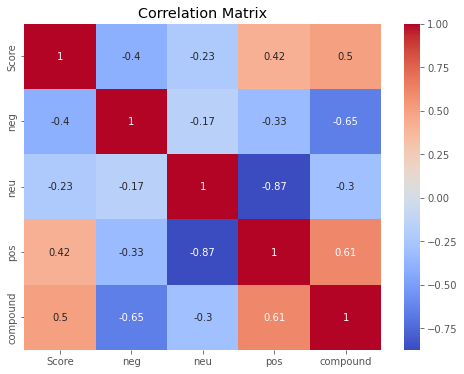

In [47]:
# Compute correlation matrix
corr = df[['Score', 'neg', 'neu', 'pos', 'compound']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 6. Conclusion
In this analysis, we used the VADER sentiment analyzer to compute sentiment scores for Amazon Fine Food Reviews. The results indicate a positive correlation between the compound sentiment scores and the review ratings provided by users.

* Positive Reviews: Higher-rated reviews tend to have higher positive and compound sentiment scores.
* Negative Reviews: Lower-rated reviews tend to have higher negative sentiment scores.

This suggests that the VADER sentiment analyzer is effective in capturing the sentiment expressed in the reviews.

# Notes

* VADER Sentiment Analyzer: VADER is designed for sentiments expressed in social media and works well with text data similar to product reviews.

* Data Subset: We used a subset of the data (10,000 reviews) to ensure the notebook runs efficiently in the Kaggle environment.

* Limitations: VADER may not capture complex linguistic nuances, sarcasm, or context-specific sentiments. For more advanced analysis, transformer-based models can be used, but they require proper model files and may need internet access to download.

# Save Results

In [48]:
# Save the dataframe with sentiment scores
df.to_csv('amazon_reviews_with_sentiment.csv', index=False)
